# Assignment
In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. 

https://www.kaggle.com/noriuk/us-education-datasets-unification-project

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:


### 1. Determine all the variable types and find the fraction of the missing values for each variable.


In [0]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine(f'postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}')

edu_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
# basic df info
edu_df.info()
edu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


From the above, we can see PRIMARY_KEY and STATE are object dtypes that house strings and are categorical; YEAR looks like it might be categorical as well; from the kaggle website, we see enroll is number of students enrolled, so with the other columns of revenue numbers and AVG scores, those should be continuous ratio.

Let's do another check to see if we are correct on our assumption about YEAR

In [5]:
# print nunique values in all columns
print('The number of unique values per column:')
for i in edu_df.columns:
  print(f'{i} has {edu_df[i].nunique()} of {edu_df[i].value_counts().sum()} total values')

The number of unique values per column:
PRIMARY_KEY has 1487 of 1492 total values
STATE has 80 of 1492 total values
YEAR has 26 of 1492 total values
ENROLL has 1224 of 1229 total values
TOTAL_REVENUE has 1274 of 1280 total values
FEDERAL_REVENUE has 1275 of 1280 total values
STATE_REVENUE has 1251 of 1280 total values
LOCAL_REVENUE has 1275 of 1280 total values
TOTAL_EXPENDITURE has 1275 of 1280 total values
INSTRUCTION_EXPENDITURE has 1275 of 1280 total values
SUPPORT_SERVICES_EXPENDITURE has 1275 of 1280 total values
OTHER_EXPENDITURE has 1222 of 1229 total values
CAPITAL_OUTLAY_EXPENDITURE has 1275 of 1280 total values
GRADES_PK_G has 1261 of 1319 total values
GRADES_KG_G has 1348 of 1360 total values
GRADES_4_G has 1340 of 1361 total values
GRADES_8_G has 1347 of 1361 total values
GRADES_12_G has 1342 of 1361 total values
GRADES_1_8_G has 1360 of 1361 total values
GRADES_9_12_G has 1358 of 1361 total values
GRADES_ALL_G has 1318 of 1319 total values
AVG_MATH_4_SCORE has 535 of 536 

Our assumption regarding year does appear to be correct, so let's summarize our variables:

## _VARIABLE TYPES_

PRIMARY_KEY: Made up of the state and year, this is a categorical variable where each data point is a mashup of a nominal and ordinal identifier, which is why there are so many unique values.

STATE: nominal categorical

YEAR: ordinal categorical

The rest of the variables are all continuous ratio






Let's look at the percentage of missing values per variable:

In [6]:
# Function for pct missing values per variable
print('Percent Missing Values Per Variable')
for col in edu_df.columns:
  print('-----------------')
  print(f'{col} \n{round((edu_df[col].isnull().sum()*100)/edu_df.shape[0],2)}%')
  

Percent Missing Values Per Variable
-----------------
PRIMARY_KEY 
0.0%
-----------------
STATE 
0.0%
-----------------
YEAR 
0.0%
-----------------
ENROLL 
17.63%
-----------------
TOTAL_REVENUE 
14.21%
-----------------
FEDERAL_REVENUE 
14.21%
-----------------
STATE_REVENUE 
14.21%
-----------------
LOCAL_REVENUE 
14.21%
-----------------
TOTAL_EXPENDITURE 
14.21%
-----------------
INSTRUCTION_EXPENDITURE 
14.21%
-----------------
SUPPORT_SERVICES_EXPENDITURE 
14.21%
-----------------
OTHER_EXPENDITURE 
17.63%
-----------------
CAPITAL_OUTLAY_EXPENDITURE 
14.21%
-----------------
GRADES_PK_G 
11.6%
-----------------
GRADES_KG_G 
8.85%
-----------------
GRADES_4_G 
8.78%
-----------------
GRADES_8_G 
8.78%
-----------------
GRADES_12_G 
8.78%
-----------------
GRADES_1_8_G 
8.78%
-----------------
GRADES_9_12_G 
8.78%
-----------------
GRADES_ALL_G 
11.6%
-----------------
AVG_MATH_4_SCORE 
64.08%
-----------------
AVG_MATH_8_SCORE 
64.34%
-----------------
AVG_READING_4_SCORE 
64.28

---
### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?


In [0]:
# Creating a copy of the df and removing the YEAR variable for ease
edu_df2 = edu_df.copy()
edu_df2.drop(['YEAR'], axis=1, inplace=True)

In [8]:
edu_df2.head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


Now, the most simple way to handle AVG_MATH_4_SCORE,	AVG_MATH_8_SCORE,	AVG_READING_4_SCORE,	AVG_READING_8_SCORE would be to replace the NaNs with the variable mean since the variables are averages.

In [9]:
for i in ['AVG_MATH_4_SCORE',	'AVG_MATH_8_SCORE',	'AVG_READING_4_SCORE',	'AVG_READING_8_SCORE']:
  edu_df2[i].fillna(edu_df2[i].mean(), inplace=True)

edu_df2.head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132


The ENROLL and GRADES_ALL_G variables can be considered the same per the Kaggle link. ENROLL has a higher pct of missing values than GRADES_ALL_G, and it may be possible to replace the NaN values in GRADES_ALL_G with some of the corresponding values in ENROLL. Then the ENROLL variable could be dropped entirely as the kaggle link states GRADES_ALL is comparable.

In [10]:
# Total Nan Values for GRADES_ALL_G
edu_df2[(edu_df2['GRADES_ALL_G'].isnull())].shape[0]

173

In [11]:
# Total values where there is a NaN in both ENROLL and GRADES_ALL_G
edu_df2[(edu_df2['ENROLL'].isnull())&(edu_df2['GRADES_ALL_G'].isnull())].shape[0]

112

So by replacing these values as stated above we would reduce the NaNs in GRADES_ALL_G by about 1/3

In [12]:
# Replacing these values
for i in range(0,edu_df2['GRADES_ALL_G'].shape[0]):
  if pd.isnull(edu_df2.GRADES_ALL_G[i]):
    edu_df2.GRADES_ALL_G[i] = edu_df2.ENROLL[i]

#verifying shape of GRADES_ALL_G has changed
edu_df2[(edu_df2['GRADES_ALL_G'].isnull())].shape[0]

112

In [13]:
print(f'GRADES_ALL_G \n{round((edu_df2.GRADES_ALL_G.isnull().sum()*100)/edu_df2.shape[0],2)}%')

GRADES_ALL_G 
7.51%


Missing values for GRADES_ALL_G went from 11.6% to 7.51%. 

In [0]:
# Dropping ENROLL as it is now redundant
edu_df2.drop(['ENROLL'],axis=1, inplace=True)

In [15]:
# Getting a count for the number of observations with null data
edu_df2[edu_df2.isnull().any(axis=1)]
# 324 rows - this is more than 1/5 of our data, so let's see what else we can do

,PRIMARY_KEY,STATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.661132
1,1992_ALASKA,ALASKA,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,234.768293,278.414711,218.866154,258.859712
2,1992_ARIZONA,ARIZONA,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.661132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


Okay, so real talk. I got stuck here on how to proceed, so I went to look at the example solutions provided:

https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_missing_values/solution.ipynb

Turns out I'm making this way harder on myself, and questions 1 and 2 weren't nearly as complicated as I was making them. Obviously I disagree with the one-size-fits-all approach of just imputing the mean values for every column, but for the sake of time, I will do that for the rest of the data.

Let's see where we stand on nulls per column:

In [18]:
edu_df2.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    112
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

In [0]:
# Columns that have null values:
cols = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 
        'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
        'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 
        'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

# Loop through above list, and fill in the mean of each respective column column
for col in cols:
  edu_df2[col].fillna(edu_df2[col].mean(), inplace=True)


In [20]:
edu_df2.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

Nulls have been delt with per the question

---
### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.


In [68]:
edu_df3 = edu_df.copy()
edu_df3.info()
edu_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


We now have a second copy of the original DF. Let's get our unique year values and the unique column names that have NaNs:

In [70]:
years = edu_df3['YEAR'].unique()
years

array([1992, 2001, 1993, 2016, 1994, 1995, 1996, 1997, 1998, 1999, 2017,
       2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [0]:
na_cols = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
       'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G', 
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 
       'AVG_READING_8_SCORE']

In [0]:
# This loop will loop through all years sectioning the df by year and imputing the mean of each column
# to its respective NaN values
for col in na_cols:
  for year in years:
    edu_df3.loc[edu_df3["YEAR"] == year, col] = edu_df3.loc[edu_df3["YEAR"] == year, col].fillna(
            edu_df3[edu_df3["YEAR"] == year][col].mean())

In [73]:
edu_df3.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          107
TOTAL_REVENUE                    51
FEDERAL_REVENUE                  51
STATE_REVENUE                    51
LOCAL_REVENUE                    51
TOTAL_EXPENDITURE                51
INSTRUCTION_EXPENDITURE          51
SUPPORT_SERVICES_EXPENDITURE     51
OTHER_EXPENDITURE               107
CAPITAL_OUTLAY_EXPENDITURE       51
GRADES_PK_G                     102
GRADES_KG_G                     102
GRADES_4_G                      102
GRADES_8_G                      102
GRADES_12_G                     102
GRADES_1_8_G                    102
GRADES_9_12_G                   102
GRADES_ALL_G                    102
AVG_MATH_4_SCORE                860
AVG_MATH_8_SCORE                860
AVG_READING_4_SCORE             860
AVG_READING_8_SCORE             860
dtype: int64

Not entirely sure what to do regarding this result. I checked the solutions provided and they approach the problem in the same way. Unsure why the nulls are only partially being filled. 

My guess is that some years did not have any data points, so it was unable to input the mean?

### 4. This time, fill in the missing values using interpolation (extrapolation).


In [0]:
edu_df4 = edu_df.copy()

for col in na_cols:
  edu_df4.loc[:, col] = edu_df4.loc[:, col].interpolate(limit_direction='both')

In [78]:
edu_df4.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

Not entirely sure the best way to proceed since Q3 did not seem to go as planned....

In [87]:
compare_cols = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 
       'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G','GRADES_9_12_G', 
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 
       'AVG_READING_8_SCORE']

for col in compare_cols:
  print(f'Stastics for column: {col}')
  print(pd.concat([edu_df[col], edu_df2[col], edu_df3[col], edu_df4[col]], axis=1).describe())
  print('\n')

Stastics for column: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425600e+06   2.546261e+06
50%     5.079546e+06   6.359310e+06   5.778507e+06   6.351760e+06
75%     1.085985e+07   9.276958e+06   1.116863e+07   1.803650e+07
max     8.921726e+07   8.921726e+07   8.921726e+07   8.921726e+07


Stastics for column: FEDERAL_REVENUE
       FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE
count     1.280000e+03     1.492000e+03     1.441000e+03     1.492000e+03
mean      7.663723e+05     7.663723e+05     7.662749e+05     8.922691e+05
std       1.145242e+06     1.060702e+06     1.085057e+06     1.106788e+06
min       3.102000e+04     3.102000e

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
plt.style.use('dark_background')

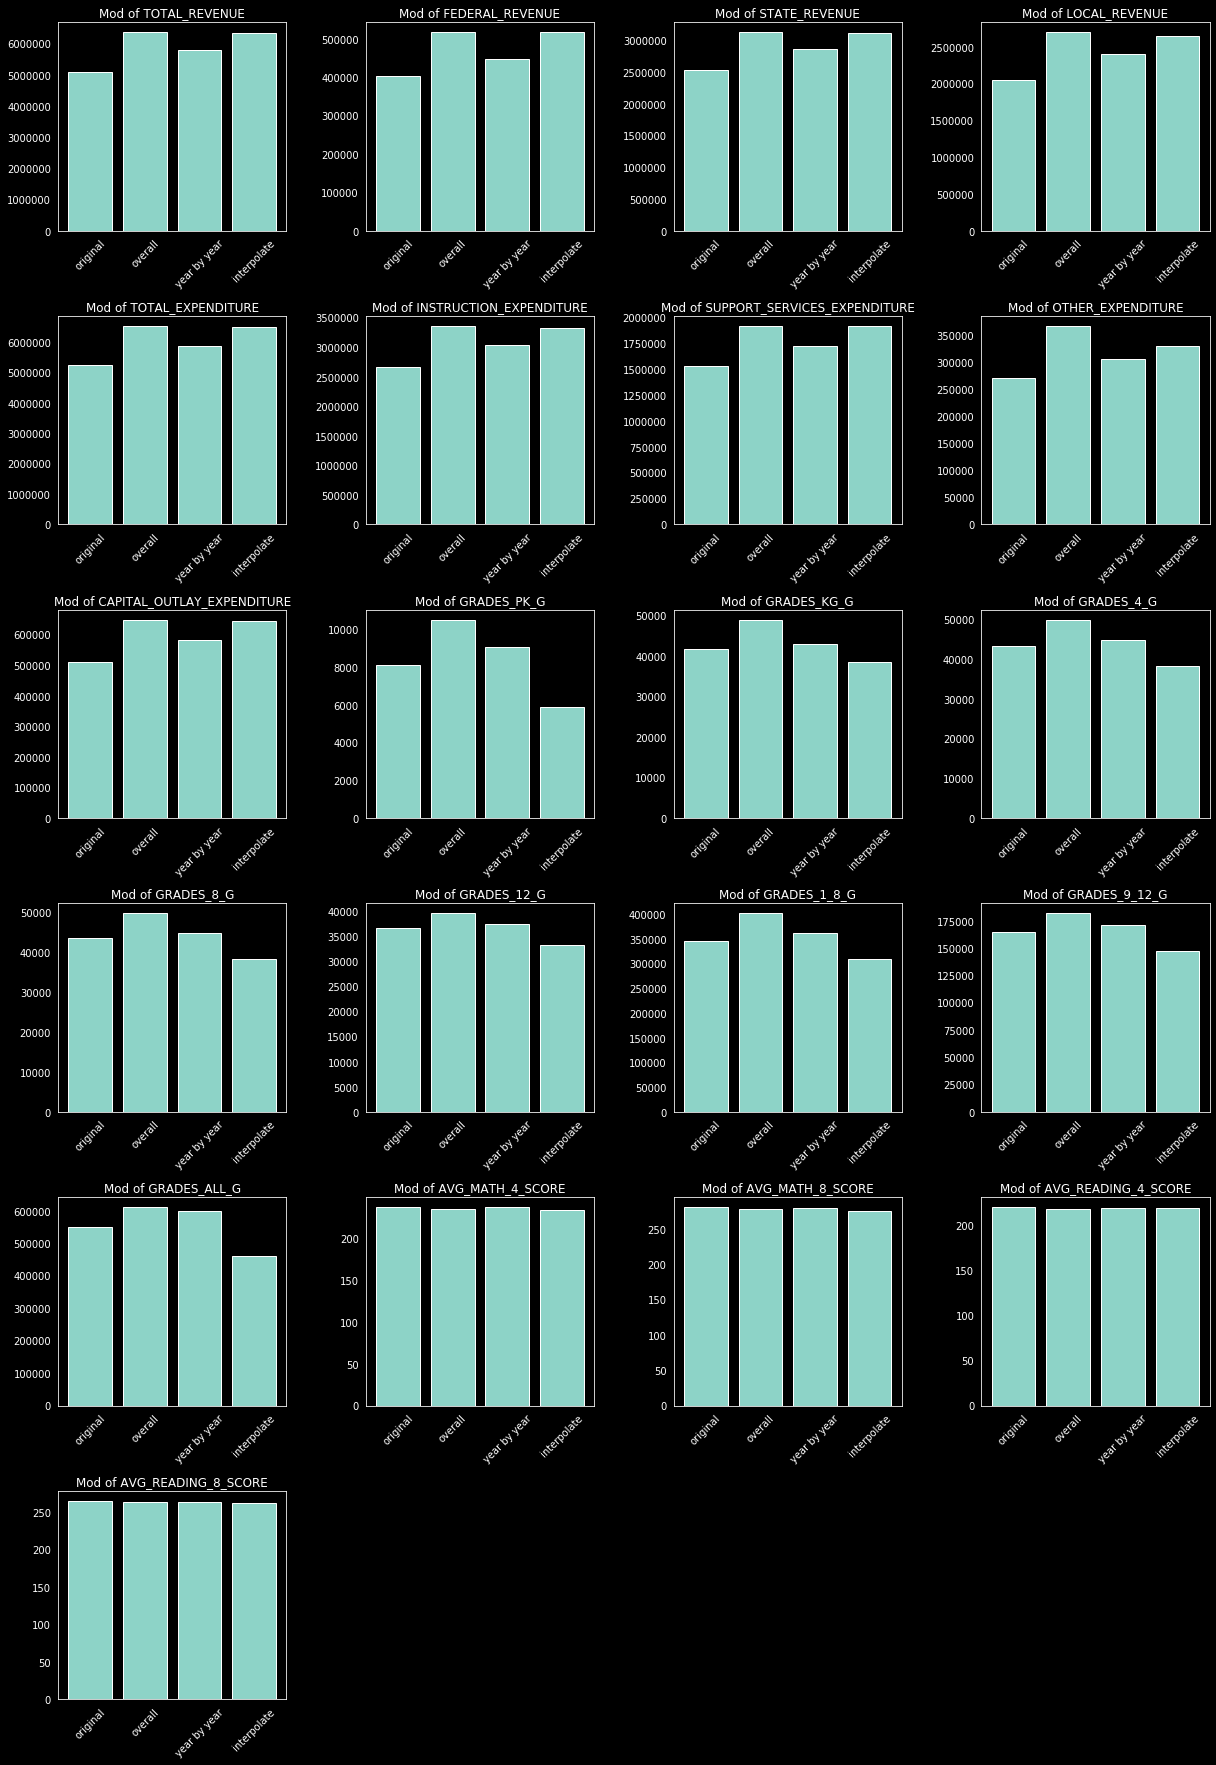

In [102]:
plt.figure(figsize=(17,85))

for i, col in enumerate(compare_cols):
  df = pd.concat([edu_df[col], edu_df2[col], edu_df3[col], edu_df4[col]], axis=1)

  plt.subplot(len(compare_cols), 4, i+1)
  plt.bar(['original', 'overall', 'year by year', 'interpolate'],df.median() )
  plt.title(f'Mod of {col}')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()